In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
loan_train=pd.read_csv("/content/drive/MyDrive/DBAA/loan_prediction_train.csv")
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [ ]:
loan_train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


## **Filling the missing values:**


In [ ]:
loan_train.LoanAmount.median()

128.0

In [ ]:
loan_train.Loan_Amount_Term.median()

360.0

In [ ]:
loan_train['LoanAmount']=loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median())
loan_train['Loan_Amount_Term']=loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].median())

In [ ]:
loan_train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
gender_count=loan_train['Gender'].value_counts()
print(gender_count)


Gender
Male      489
Female    112
Name: count, dtype: int64


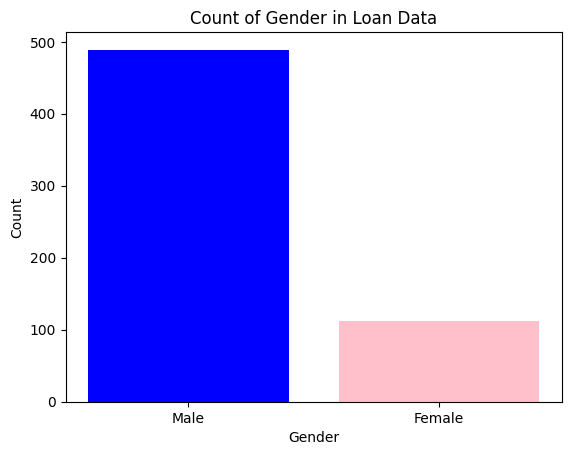

In [ ]:
plt.bar(gender_count.index, gender_count.values, color=['blue', 'pink'])  # Customize colors if needed
plt.xlabel('Gender')  # Label for the x-axis
plt.ylabel('Count')   # Label for the y-axis
plt.title('Count of Gender in Loan Data')  # Title of the chart
plt.show()

In [ ]:
married_count=loan_train['Married'].value_counts()
print(married_count)


Married
Yes    398
No     213
Name: count, dtype: int64


In [ ]:
dependents_count=loan_train['Dependents'].value_counts()
print(dependents_count)


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


In [ ]:
self_employed_count=loan_train['Self_Employed'].value_counts()
print(self_employed_count)


Self_Employed
No     500
Yes     82
Name: count, dtype: int64


In [ ]:
credit_history_count=loan_train['Credit_History'].value_counts()
print(credit_history_count)


Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


In [ ]:
def fill_missing_with_random(loan_train, columns):
    for column in columns:
        # Calculate the distribution of existing values
        category_counts = loan_train[column].value_counts()
        category_probs = category_counts / category_counts.sum()  # Probabilities for each category

        # Get the indices of missing values
        missing_indices = loan_train[loan_train[column].isna()].index

        # Generate random choices based on the calculated probabilities
        random_choices = np.random.choice(
            category_probs.index,
            size=len(missing_indices),
            p=category_probs.values
        )

        # Fill the missing values with the generated choices
        loan_train.loc[missing_indices, column] = random_choices

# List of columns to fill missing values
categorical_columns = ['Gender', 'Married', 'Dependents','Self_Employed','Credit_History']

# Fill missing values in the specified columns
fill_missing_with_random(loan_train, categorical_columns)


In [ ]:
loan_train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# **EDA:**

In [ ]:
pd.crosstab(loan_train['Credit_History'],loan_train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,85,14,99
1.0,107,408,515
All,192,422,614


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Loan_Status'>

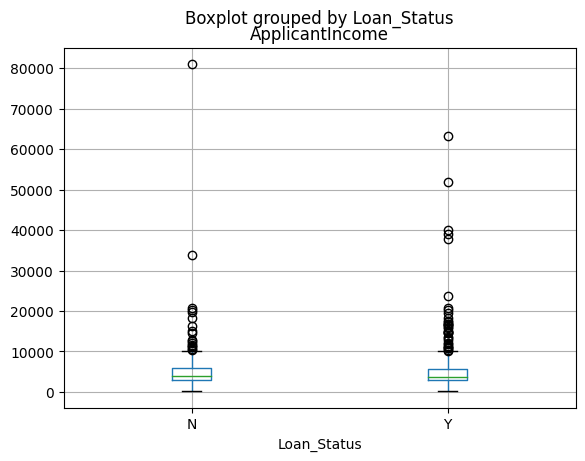

In [ ]:
loan_train.boxplot(column='ApplicantIncome', by='Loan_Status')

# **i)Filtering_Outliers:**

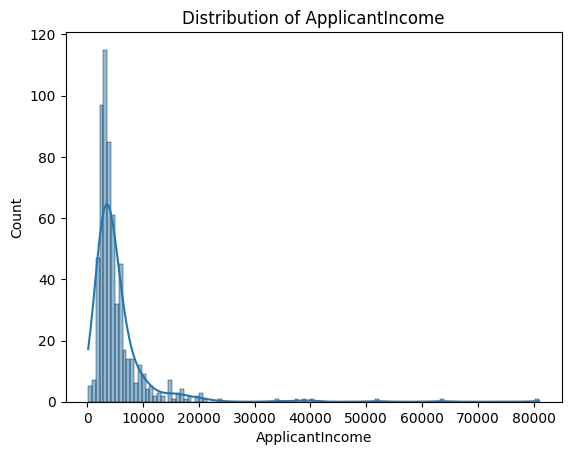

In [ ]:
sns.histplot(loan_train['ApplicantIncome'], kde=True)
plt.title('Distribution of ApplicantIncome')
plt.show()

In [ ]:
#Calculate mean and std_dev
mean = loan_train['ApplicantIncome'].mean()
std_dev = loan_train['ApplicantIncome'].std()

lower_bound = mean - 2 * std_dev
upper_bound = mean + 2 * std_dev

# Filter out outliers
outliers_filter =[(loan_train['ApplicantIncome'] >= lower_bound) & (loan_train['ApplicantIncome'] <= upper_bound)]

print(outliers_filter)

[0      True
1      True
2      True
3      True
4      True
       ... 
609    True
610    True
611    True
612    True
613    True
Name: ApplicantIncome, Length: 614, dtype: bool]


In [ ]:
# Create a boolean mask to identify inliers (True) and outliers (False)
outliers_mask = (loan_train['ApplicantIncome'] >= lower_bound) & (loan_train['ApplicantIncome'] <= upper_bound)

# Count True values (inliers) and False values (outliers)
true_count = outliers_mask.sum()  # Count of inliers (True values)
false_count = len(outliers_mask) - true_count  # Count of outliers (False values)

# Print the counts
print(f"Number of inliers (True): {true_count}")
print(f"Number of outliers (False): {false_count}")

Number of inliers (True): 598
Number of outliers (False): 16


In [ ]:
#Calculate mean and std_dev
mean = loan_train['ApplicantIncome'].mean()
std_dev = loan_train['ApplicantIncome'].std()


lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Filter out outliers
outliers_filter_3 = [(loan_train['ApplicantIncome'] >= lower_bound) & (loan_train['ApplicantIncome'] <= upper_bound)]

print(outliers_filter_3)

[0      True
1      True
2      True
3      True
4      True
       ... 
609    True
610    True
611    True
612    True
613    True
Name: ApplicantIncome, Length: 614, dtype: bool]


In [ ]:
# Create a boolean mask to identify inliers (True) and outliers (False)
outliers_mask = (loan_train['ApplicantIncome'] >= lower_bound) & (loan_train['ApplicantIncome'] <= upper_bound)

# Count True values (inliers) and False values (outliers)
true_count = outliers_mask.sum()  # Count of inliers (True values)
false_count = len(outliers_mask) - true_count  # Count of outliers (False values)

# Print the counts
print(f"Number of inliers (True): {true_count}")
print(f"Number of outliers (False): {false_count}")

Number of inliers (True): 606
Number of outliers (False): 8


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = loan_train['ApplicantIncome'].quantile(0.25)
Q3 = loan_train['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_outliers =[(loan_train['ApplicantIncome'] >= lower_bound) & (loan_train['ApplicantIncome'] <= upper_bound)]
print(filtered_outliers)

[0      True
1      True
2      True
3      True
4      True
       ... 
609    True
610    True
611    True
612    True
613    True
Name: ApplicantIncome, Length: 614, dtype: bool]


In [ ]:
# Create the boolean mask for outliers
outliers_mask = (loan_train['ApplicantIncome'] >= lower_bound) & (loan_train['ApplicantIncome'] <= upper_bound)

# Count how many are True (within bounds) and False (outliers)
true_count = outliers_mask.sum()  # True values (inliers)
false_count = len(outliers_mask) - true_count  # False values (outliers)

print(f"Number of True values (inliers): {true_count}")
print(f"Number of False values (outliers): {false_count}")

Number of True values (inliers): 564
Number of False values (outliers): 50


 I choose 2 sigma method to remove the outliers as it remove more number of outliers from the data.


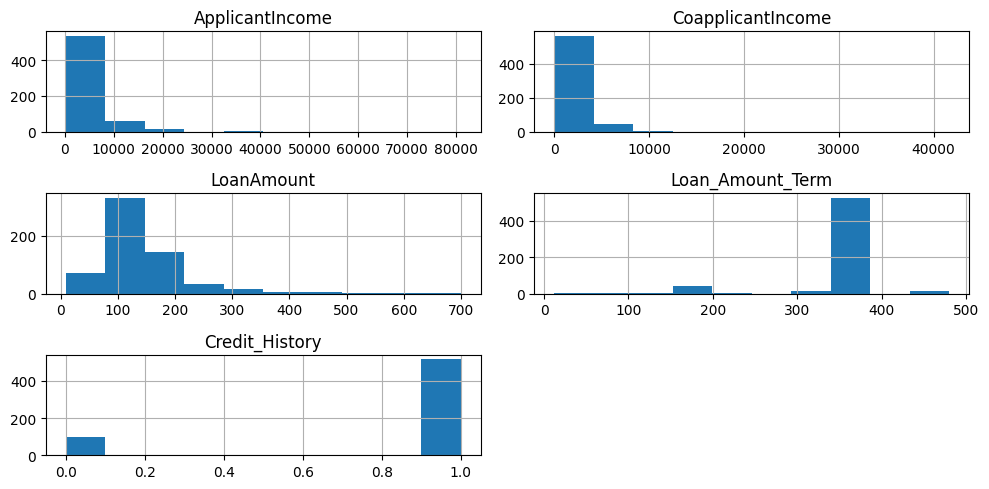

In [ ]:
#Distribution of the dataset
loan_train.hist(bins=10, figsize=(10, 5))
plt.tight_layout()
plt.show()

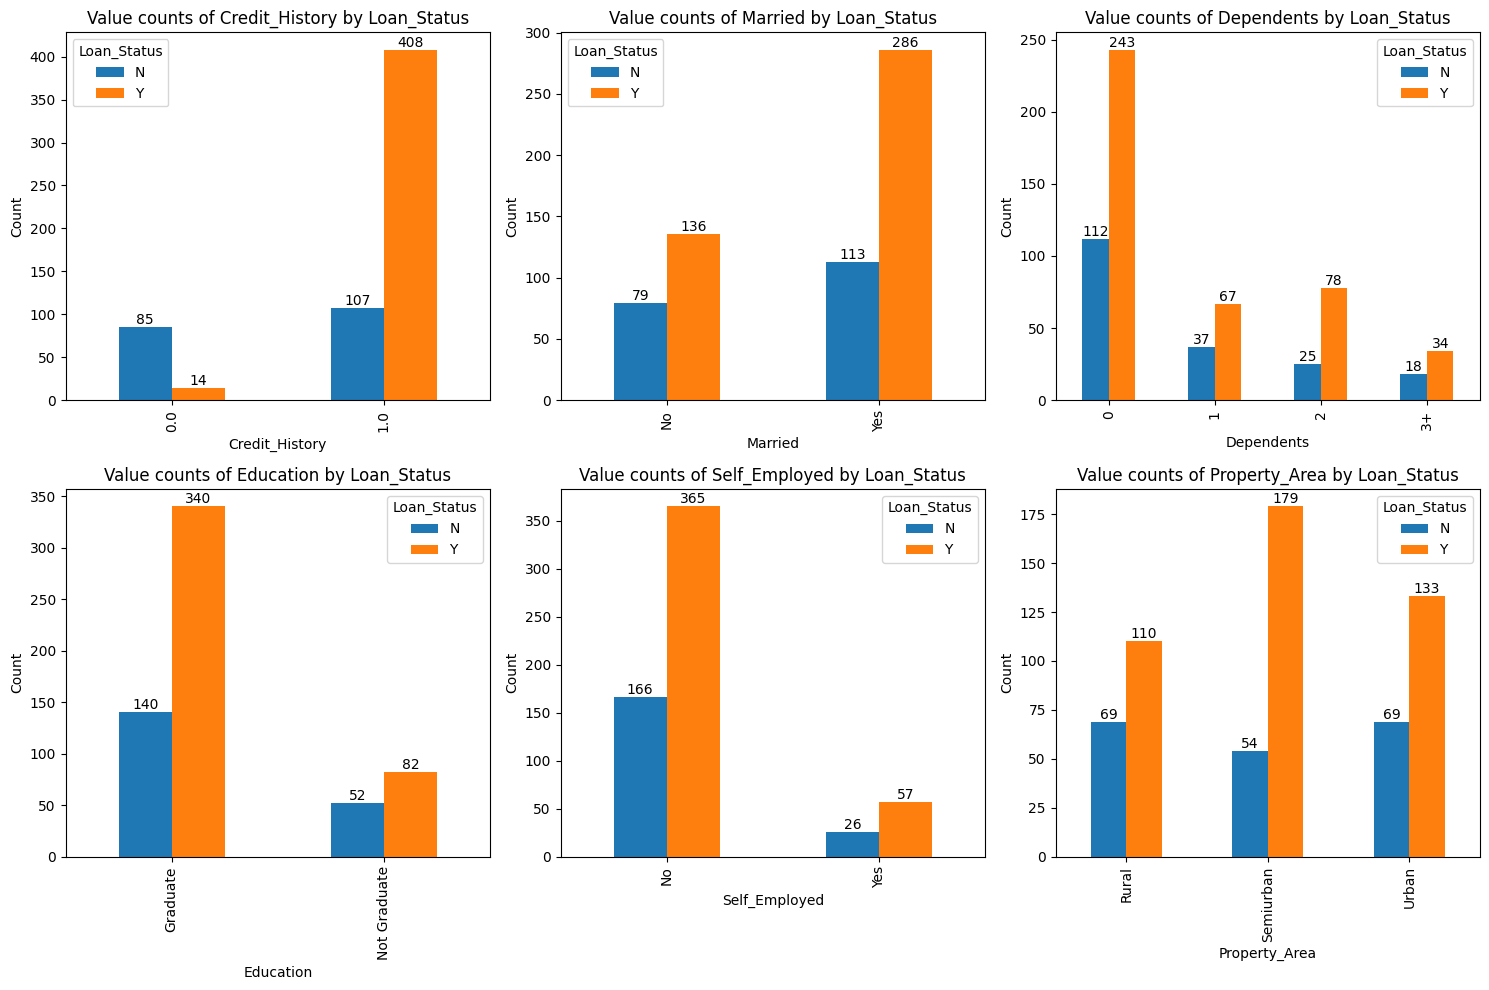

In [ ]:
plot_column=['Credit_History','Married','Dependents','Education','Self_Employed','Property_Area']
fig ,axes =plt.subplots(nrows=2,ncols=3,figsize=(15,10),sharex=False)

for i,column in enumerate(plot_column):
  ax=axes.flatten()[i]
  crosstab_result=pd.crosstab(loan_train[column],loan_train['Loan_Status'])
  crosstab_result.plot(kind='bar',ax=ax)
  ax.set_title(f'Value counts of {column} by Loan_Status')
  ax.set_xlabel(column)
  ax.set_ylabel('Count')
  #Adding data labels
  for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom')


plt.tight_layout()
plt.show()


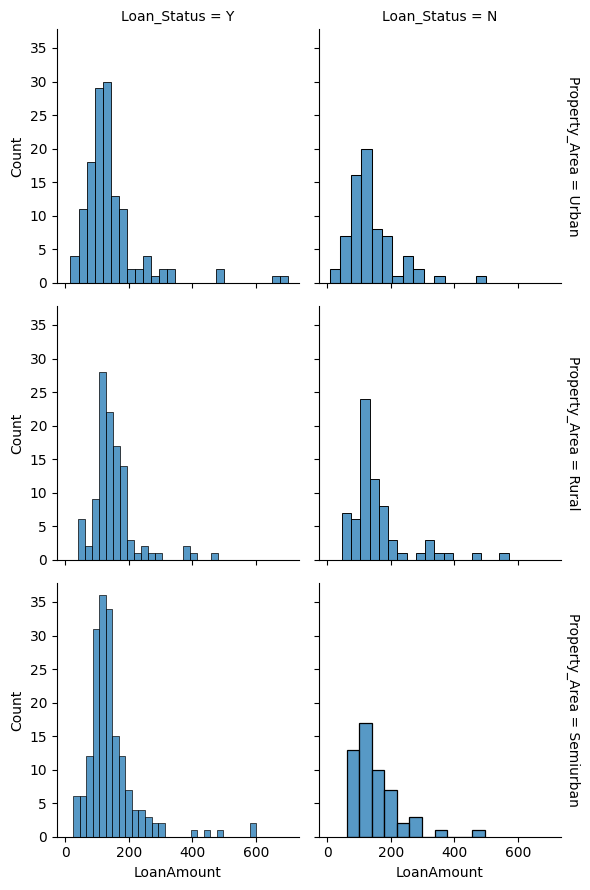

In [ ]:
#LoanAmount Distribution by Loan_Status and Property_Area
tr= sns.FacetGrid(loan_train, col='Loan_Status', row='Property_Area', margin_titles=True)
tr.map(sns.histplot, 'LoanAmount')
plt.show()




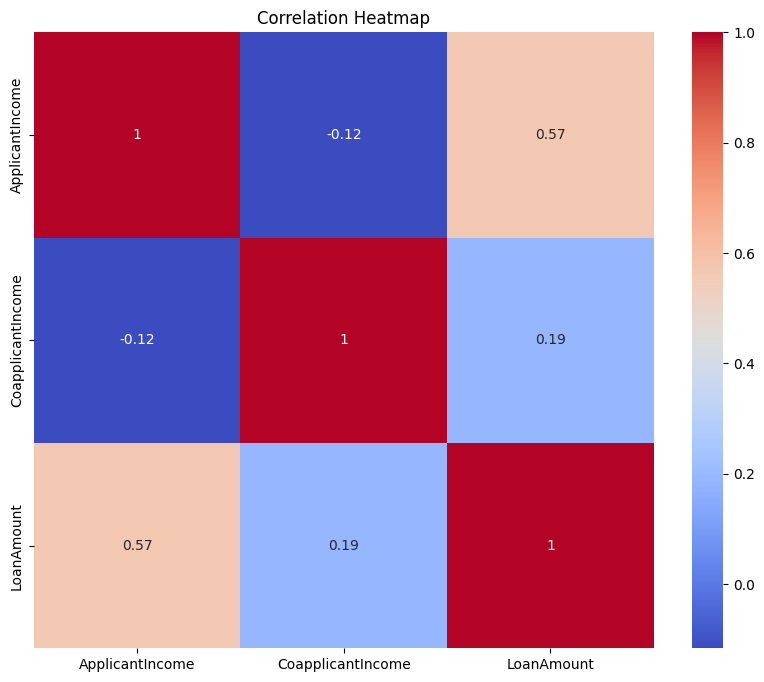

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = loan_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **Normalizing the dataset**

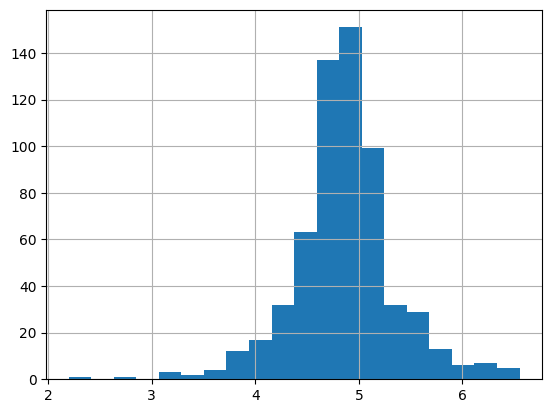

In [ ]:
loan_train['LoanAmount_log']=np.log(loan_train['LoanAmount'])
loan_train['LoanAmount_log'].hist(bins=20)
plt.show()

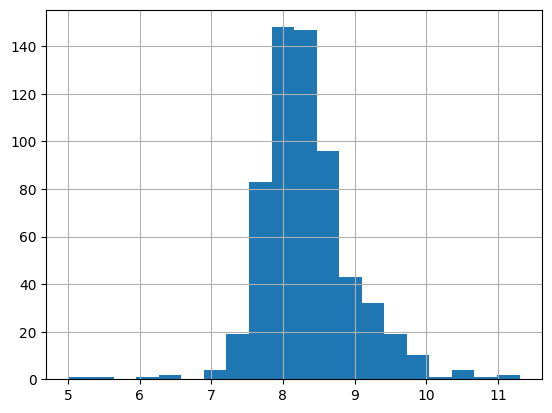

In [ ]:
loan_train['ApplicantIncome_log']=np.log(loan_train['ApplicantIncome'])
loan_train['ApplicantIncome_log'].hist(bins=20)
plt.show()

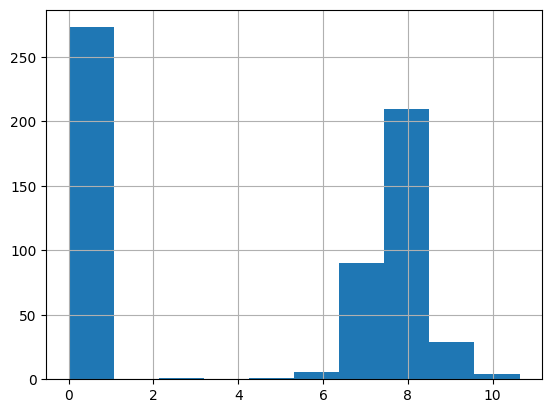

In [ ]:
loan_train['CoapplicantIncome_log']=np.log1p(loan_train['CoapplicantIncome'])
loan_train['CoapplicantIncome_log'].hist()
plt.show()

In [ ]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,8.674026,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,8.430109,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,8.006368,0.000000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,7.856707,7.765993
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,8.699515,0.000000


# **Model Building:**

In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from statsmodels.formula.api import logit
from mlxtend.plotting import plot_decision_regions

In [ ]:
#data mapping
data_mapping={'Male':0, 'Female':1,
              'Yes':0, 'No':1,
              '3+':3,
              'Graduate':0,'Not Graduate':1,
              'Urban':1, 'Semiurban':2,'Rural':3,
              'Y':0, 'N':1}

loan_train.replace(data_mapping,inplace=True)
loan_train.head()

<ipython-input-138-1f18516cebfa>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_train.replace(data_mapping,inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,CoapplicantIncome_log
0,LP001002,0,1,0,0,1,5849,0.0,128.0,360.0,1.0,1,0,4.852030,8.674026,0.000000
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,3,1,4.852030,8.430109,7.319202
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,1,0,4.189655,8.006368,0.000000
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,1,0,4.787492,7.856707,7.765993
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,1,0,4.948760,8.699515,0.000000


In [ ]:
model_1=logit(formula='Loan_Status ~ Married+Self_Employed+ApplicantIncome+CoapplicantIncome+LoanAmount+Loan_Amount_Term+Credit_History+Property_Area',data=loan_train).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.485762
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.2181
Time:                        16:54:17   Log-Likelihood:                -298.26
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 7.408e-32
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8255      0.739      1.118      0.264      -0.622       2.273
Married               0.5205      0.214      2.432      0.015       0.101       0.940
Self_Employed        -0.0164      0.301     -0.055      0.957      -0.607       0.574
ApplicantIncome   -7.681e-06   2.18e-05     -0.353      0.724   -5.04e-05     3.5e-05
CoapplicantIncome  4.539e-05   3.26e-05      1.391      0.164   -1.86e-05       0.000
LoanAmount            0.0014      0.002      0.901      0.367      -0.002       0.004
Loan_Amount_Term      0.0011      0.002      0.644      0.520      -0.002       0.004
Credit_History       -3.1964      0.312    -10.237      0.000      -3.808      -2.584
Property_Area         0.1162      0.131      0.886      0.375      -0.141       0.373
=====================================================================================
"""

In [ ]:
# Odds Ratio
np.exp(model_1.params)

,0
Intercept,2.283014
Married,1.682874
Self_Employed,0.983710
ApplicantIncome,0.999992
CoapplicantIncome,1.000045
LoanAmount,1.001373
Loan_Amount_Term,1.001100
Credit_History,0.040910
Property_Area,1.123183


In [ ]:
# predicted probability for the class for model 1
X_test1=loan_train.iloc[:,2:12]
probs1=model_1.predict(X_test1)
print(probs1)

0      0.227186
1      0.192435
2      0.142886
3      0.164706
4      0.230127
         ...   
609    0.259709
610    0.139718
611    0.170870
612    0.157473
613    0.892956
Length: 614, dtype: float64


In [ ]:
# predicted class of test set for model 1
y_pred1=np.where(probs1>0.5,1,0)  # Default prob cut-off=0.5
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [ ]:

# overall accuracy of the model
regression_accuracy=np.mean(loan_train.Loan_Status==y_pred1)

In [ ]:
# confusion matrix for model 2
pd.crosstab(loan_train.Loan_Status,y_pred1,rownames=['Loan_status'],colnames=['Predicted'])

Predicted,0,1
Loan_status,,
0,408,14
1,105,87


In [ ]:
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(loan_train.Loan_Status, probs1)
roc_auc1 = auc(fpr, tpr)
roc_auc1

0.7535668443917851

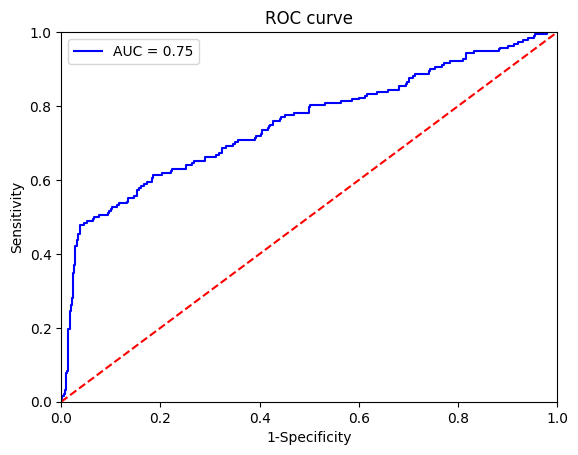

In [ ]:
# Plot ROC curve for model 2
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity')
plt.xlabel('1-Specificity')
plt.show()

In [ ]:
x=loan_train.iloc[:,1:11].values
y=loan_train.iloc[:,12].values

In [ ]:
x

array([[0, 1, '0', ..., 128.0, 360.0, 1.0],
       [0, 0, '1', ..., 128.0, 360.0, 1.0],
       [0, 0, '0', ..., 66.0, 360.0, 1.0],
       ...,
       [0, 0, '1', ..., 253.0, 360.0, 1.0],
       [0, 0, '2', ..., 187.0, 360.0, 1.0],
       [1, 1, '0', ..., 133.0, 360.0, 0.0]], dtype=object)

In [ ]:
y

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [ ]:
#'x' and 'y' are features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Make predictions and calculate accuracy before feature selection
y_pred = rf.predict(x_test)
initial_accuracy = accuracy_score(y_test, y_pred)

In [ ]:
initial_accuracy

0.7804878048780488

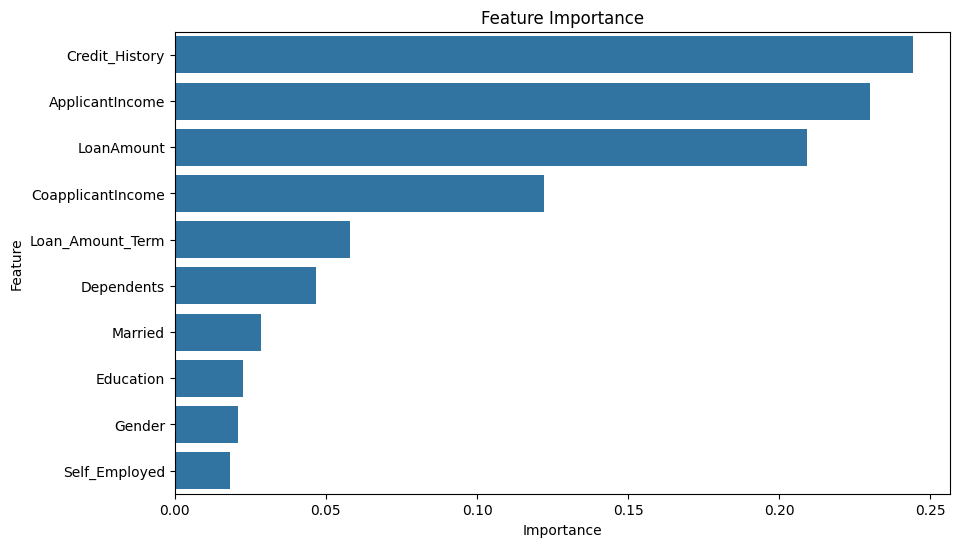

In [ ]:
# Get Feature Importances
feature_importances = rf.feature_importances_
feature_names = loan_train.columns[1:11]


# Create a DataFrame to visualize and sort feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualize the most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [ ]:
# Feature Selection (Select top 6 most important features)
top_features = feature_importance_df['Feature'].iloc[:6].values

# Get the column indices of the top features within the selected features
# (Assuming x_train and x_test are based on feature_names)
top_feature_indices = [list(feature_names).index(feature) for feature in top_features]

# Select the top features from the training and testing data using the indices
x_train_selected = x_train[:, top_feature_indices]  # Use integer indexing for NumPy arrays
x_test_selected = x_test[:, top_feature_indices]  # Use integer indexing for NumPy arrays

In [ ]:
#train a new model with selected features
rf_new = RandomForestClassifier(n_estimators=100, random_state=42)  # Use RandomForestRegressor for regression
rf_new.fit(x_train_selected, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#evaluate the model
y_pred = rf_new.predict(x_test_selected)
RF_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after feature selection and scaling: {RF_accuracy:.3f}')

Accuracy after feature selection and scaling: 0.772


# DESICION TREE:

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
X = loan_train[['Loan_Amount_Term', 'Dependents', 'CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Married','Credit_History']]
y = loan_train['Loan_Status']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.40)

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(x_train, y_train)

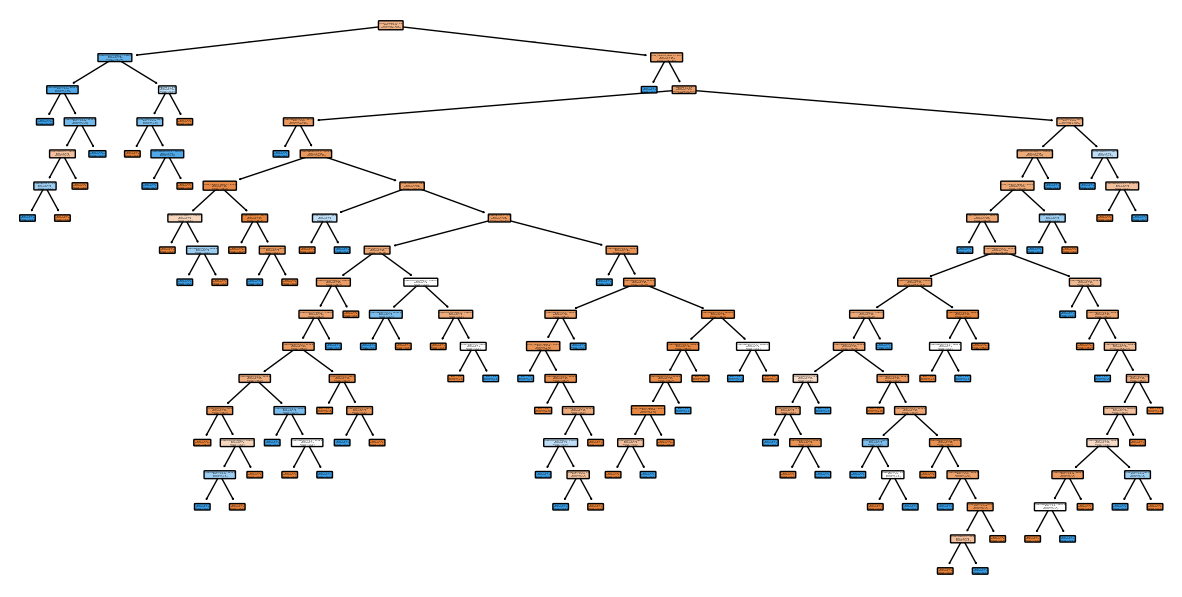

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
          filled = True,
          rounded = True,
          class_names=["yes","no"],
          feature_names=x_train.columns
          )
plt.show()

In [ ]:
clf_dt.score(x_test,y_test)

0.6788617886178862

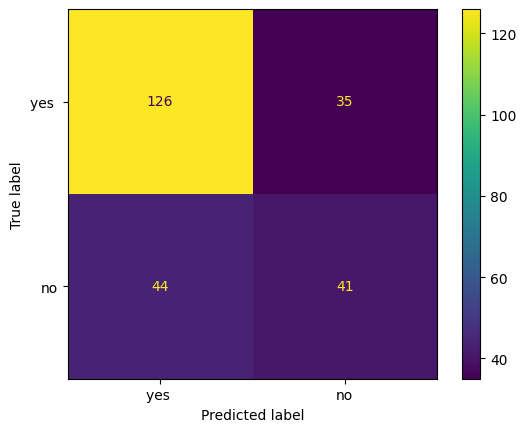

In [ ]:

predictions = clf_dt.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["yes ","no"])
disp.plot()

In [ ]:
path = clf_dt.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[ccp_alphas>=0]

clf_dts = []


<Axes: xlabel='alpha'>

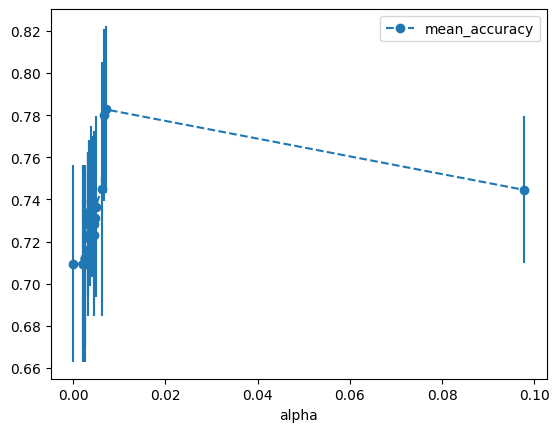

In [ ]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_dt, x_train, y_train, cv=5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=["alpha","mean_accuracy","std"])
alpha_results.plot(x="alpha",
                   y="mean_accuracy",
                   yerr = "std",
                   marker="o",
                   linestyle="--")

In [ ]:
alpha_results.sort_values(by=["mean_accuracy"], ascending = False).head(10)

,alpha,mean_accuracy,std
30,0.007035,0.782747,0.039632
29,0.006670,0.780044,0.040834
28,0.006159,0.744909,0.060331
31,0.097760,0.744539,0.034880
18,0.003963,0.739356,0.035295
27,0.004891,0.736616,0.043152
23,0.004295,0.736616,0.033520
22,0.004227,0.736616,0.033520
21,0.004148,0.736616,0.033520
20,0.004143,0.736616,0.033520


In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.005473) & (alpha_results['alpha'] < 0.006793)]['alpha']
ideal_ccp_alpha

,alpha
28,0.006159
29,0.006670


In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.005473) & (alpha_results['alpha'] < 0.006793)]['alpha'].values[0]
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.006159420289855075

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(x_train, y_train)

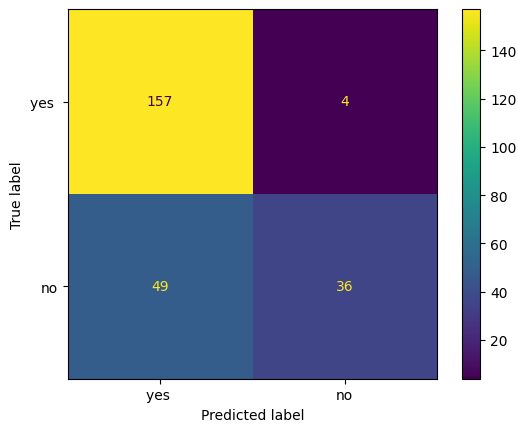

In [ ]:
#getting confusion matrix after ccp
predictions = clf_dt_pruned.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf_dt_pruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["yes ","no"])
disp.plot()

In [ ]:
Decision_accuracy=clf_dt_pruned.score(x_test,y_test)
Decision_accuracy

0.7845528455284553

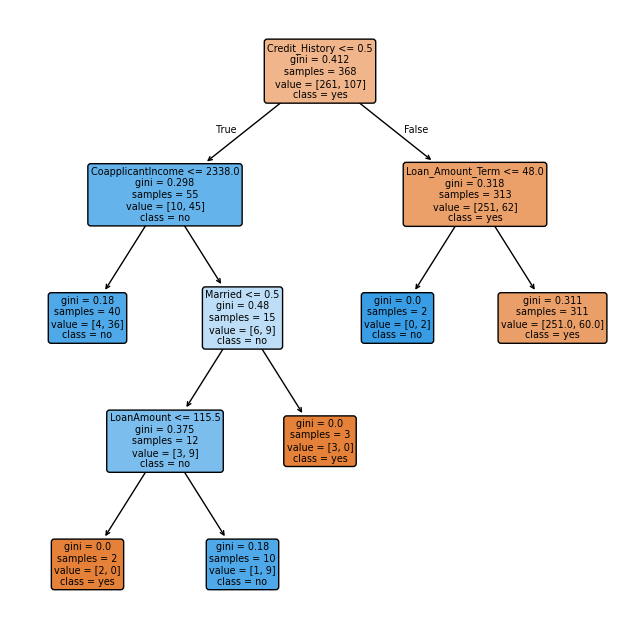

In [ ]:
plt.figure(figsize=(8, 8))
plot_tree(clf_dt_pruned,
          filled = True,
          rounded = True,
          class_names=["yes","no"],
          feature_names=x_train.columns
          )
plt.show()

This decision tree focusing first on credit history and then considering coapplicant and applicant income where better credit and higher income improving the chances of approval.

# **Fitting the model into Test set**

In [ ]:
loan_test=pd.read_csv("/content/drive/MyDrive/DBAA/loan_prediction_test (2).csv")
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
loan_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 37.3+ KB


In [ ]:
loan_test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
loan_test['LoanAmount']=loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].median())
loan_test['Loan_Amount_Term']=loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].median())

In [ ]:
def fill_missing_with_random(loan_test, columns):
    for column in columns:
        # Calculate the distribution of existing values
        category_counts = loan_test[column].value_counts()
        category_probs = category_counts / category_counts.sum()  # Probabilities for each category

        # Get the indices of missing values
        missing_indices = loan_test[loan_test[column].isna()].index

        # Generate random choices based on the calculated probabilities
        random_choices = np.random.choice(
            category_probs.index,
            size=len(missing_indices),
            p=category_probs.values
        )

        # Fill the missing values with the generated choices
        loan_test.loc[missing_indices, column] = random_choices

# List of columns to fill missing values
categorical_columns = ['Gender','Dependents','Self_Employed','Credit_History']

# Fill missing values in the specified columns
fill_missing_with_random(loan_test, categorical_columns)


In [ ]:
loan_test.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
#data mapping
data_mapping={'Male':1, 'Female':0,
              'Yes':1, 'No':0,
              '3+':3,
              'Graduate':1,'Not Graduate':0,
              'Urban':1, 'Semiurban':2,'Rural':3}

loan_test.replace(data_mapping,inplace=True)
loan_test.head()

<ipython-input-216-f364c2d679e7>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_test.replace(data_mapping,inplace=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,1
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,1
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,0.0,1
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,1


In [ ]:
test_predict=clf_dt_pruned.predict(loan_test[['Loan_Amount_Term', 'Dependents', 'CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Married','Credit_History']])

In [ ]:
loan_test['Loan_Status']=test_predict
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,1,0
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1,0
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,1,0
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,0.0,1,0
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,0,1,4009,1777,113.0,360.0,1.0,1,0
363,LP002975,1,1,0,1,0,4158,709,115.0,360.0,1.0,1,0
364,LP002980,1,0,0,1,0,3250,1993,126.0,360.0,1.0,2,0
365,LP002986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,3,0


In [ ]:
loan_test['Loan_Status'].value_counts()

,count
Loan_Status,
0,312
1,55
